In [3]:
!pip install pandas dotenv fredapi streamlit flask yfinance

  Using cached yfinance-1.2.0-py2.py3-none-any.whl.metadata (6.1 kB)
  Preparing metadata (setup.py) ... done
  Using cached curl_cffi-0.13.0-cp39-abi3-macosx_11_0_arm64.whl.metadata (13 kB)
Using cached yfinance-1.2.0-py2.py3-none-any.whl (130 kB)
Using cached curl_cffi-0.13.0-cp39-abi3-macosx_11_0_arm64.whl (3.0 MB)
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15548 sha256=f4dc6786a23c1d26153cdb8ef24d50e5c75ad88ba0966b4660f1a911d840818c
  Stored in directory: /Users/sanghamitra/Library/Caches/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
Successfully built multitasking


In [30]:

import streamlit as st
import yfinance as yf
from fredapi import Fred
import pandas as pd
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:


# --- S&P 500 ---
@st.cache_data(ttl=3600)
def load_sp500():
    return yf.download("^GSPC",
                       start="2010-01-01",
                       end="2020-12-31")



sp500 = load_sp500()
if "Adj Close" in sp500.columns:
    sp500 = sp500["Adj Close"]
else:
    sp500 = sp500["Close"]
#sp500 = sp500.resample("ME").last()  # Monthly to match PMI
print(type(sp500))
#sp500 = pd.DataFrame(sp500)
sp500.columns = ["S&P500"]
print(sp500)

2026-02-20 16:17:29.069 No runtime found, using MemoryCacheStorageManager
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
                 S&P500
Date                   
2010-01-04  1132.989990
2010-01-05  1136.520020
2010-01-06  1137.140015
2010-01-07  1141.689941
2010-01-08  1144.979980
...                 ...
2020-12-23  3690.010010
2020-12-24  3703.060059
2020-12-28  3735.360107
2020-12-29  3727.040039
2020-12-30  3732.040039

[2768 rows x 1 columns]


In [37]:
@st.cache_data(ttl=1000)
def load_fred():
    fred_api_key = "1c6f26fb75f6ca692676f755e4db56b9"
    fred = Fred(api_key=fred_api_key)
    return fred.get_series("INDPRO")


pmi = load_fred()
pmi = pmi.loc["2010-01-01":"2020-12-31"]
pmi = pd.DataFrame(pmi, columns=["PMI"])
pmi

2026-02-20 16:17:30.446 No runtime found, using MemoryCacheStorageManager


,PMI
2010-01-01,89.3426
2010-02-01,89.6779
2010-03-01,90.2928
2010-04-01,90.5991
2010-05-01,91.8230
...,...
2020-08-01,95.9549
2020-09-01,95.9669
2020-10-01,96.7394
2020-11-01,97.0816


                 S&P500      PMI
2010-01-01          NaN  89.3426
2010-01-04  1132.989990      NaN
2010-01-05  1136.520020      NaN
2010-01-06  1137.140015      NaN
2010-01-07  1141.689941      NaN
...                 ...      ...
2020-12-23  3690.010010      NaN
2020-12-24  3703.060059      NaN
2020-12-28  3735.360107      NaN
2020-12-29  3727.040039      NaN
2020-12-30  3732.040039      NaN

[2815 rows x 2 columns]


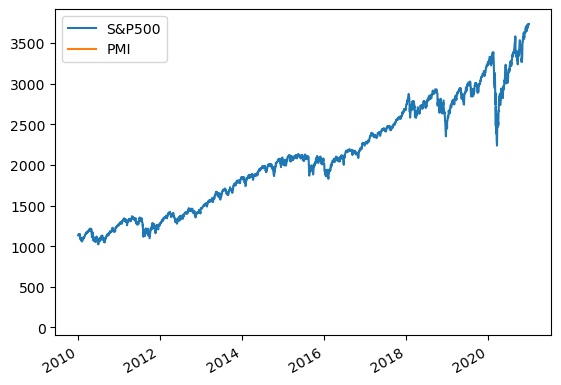

In [38]:
# --- Merge data ---
data = pd.concat([sp500, pmi], axis=1)
print(data)

# --- Plot ---
data.plot()
plt.show()